In [1]:
#! pip install pandas
#! pip install matplotlib.pyplot
#! pip install ipywidgets
#! pip install seaborn

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from ipywidgets import interact
from math import log
import seaborn as sn
#from pandas_profiling import ProfileReport

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve
from sklearn.compose import ColumnTransformer
from ipywidgets import interact

# Description of data

##Attribute Information

1) gender: "Male", "Female" or "Other"


2) age: age of the patient


3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension


4) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease


5) ever_married: "No" or "Yes"


6) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"


7) Residence_type: "Rural" or "Urban"


8) avg_glucose_level: average glucose level in blood


9) bmi: body mass index


10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*


11) stroke: 1 if the patient had a stroke or 0 if not



*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

[Real data sources](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9264165)

# Helper

In [3]:
def boxplot_(col):
    sn.boxplot(data[col])
    plt.title('{}'.format(col))
    return plt.show()

def bar_plot(column_name):
    data[column_name].value_counts(normalize=True).plot(kind="bar", color="orange")
    plt.ylabel('proportion')
    plt.title("Distribution of {}" .format(column_name))
    plt.savefig("1.png")
    return plt.show()


def boxplot_biv(col):
    sn.boxplot(x='stroke', y=col,data=data)
    plt.xlabel('stroke')
    plt.ylabel('{}'.format(col))
    return plt.show()


def bar_plot_biv(col):
    for value in np.unique(data["stroke"]):
        data.loc[data["stroke"]==value,col].value_counts(normalize=True).plot(kind='bar', color="green")
        plt.title("bar of {} when stroke is {} ".format(col, value) )
        plt.show()

        
def evaluation_model(model,features,label) :
    pred=model.predict(features)
    print(classification_report(label,pred))
    

def model_with_rfe(model):
    rfe_model=RFE(estimator=model, verbose=1)
    rfe_model.fit(train_features, train_labels)
    mask=rfe_model.support_
    reduced_X=train_features.loc[:, mask]
    print(reduced_X.columns)
    return rfe_model

def plot_auc(model,X,y):
    # prédire sur le jeu de test
    y_pred =model.decision_function(X)

    # construire la courbe ROC
    false_positif, true_positif, thr = roc_curve(y, y_pred)

    # calculer l'aire sous la courbe ROC
    auc_ = auc(false_positif, true_positif)

    fig = plt.figure(figsize=(6, 6))

    # afficher la courbe ROC
    plt.plot(false_positif, true_positif, '-', color='orange', lw=2, label='gamma=0.01, AUC=%.2f' % auc_)

    # donner un titre aux axes et au graphique
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('{} ROC Curve'.format(model), fontsize=16)

    # afficher la légende
    plt.legend(loc="lower right", fontsize=14)

    # afficher l'image
    return plt.show()
    
    

# Data Exploratory

In [6]:
profile=ProfileReport(data,
                     title="Exploratory analysis of stroke data",
                     html={'style ' : {'full_width ' : True}})

profile.to_file(output_file="stroke_dataExploration")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:314: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data=pd.read_csv(r'C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\full_data.csv')

In [5]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
data.shape

(4981, 11)

In [6]:
data.isna().sum()
""" A priori il semblerait que nous n'ayons pas de donnees manquantes mais nous en allons verifier ceci"""

" A priori il semblerait que nous n'ayons pas de donnees manquantes mais nous en allons verifier ceci"

In [7]:
data.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1711,Female,78.0,0,0,Yes,Govt_job,Urban,58.88,35.8,Unknown,0
3014,Female,26.0,0,0,No,Private,Rural,191.78,24.7,Unknown,0
957,Female,19.0,0,0,No,Private,Rural,75.08,21.7,Unknown,0
416,Male,26.0,0,0,Yes,Private,Rural,100.09,27.4,never smoked,0
4192,Male,15.0,0,0,No,children,Rural,94.24,30.2,Unknown,0


In [8]:
for col in data.select_dtypes("object"):     
        if data[col].tolist():
            print("Not Empty string!")
        else:
            print("Empty string!")

Not Empty string!
Not Empty string!
Not Empty string!
Not Empty string!
Not Empty string!


In [13]:
""" On peut donc clonclure que nous n'avons pas de donnees manquantes dans notre dataset"""

" On peut donc clonclure que nous n'avons pas de donnees manquantes dans notre dataset"

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [15]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [16]:
""" D'apres le describe, le taux de glycemie maximal de notre dataset est de 271,74. Cette valeur semble assez grande par rapport a la moyenne.Voyons donc si ce n'est pas une valeur aberrante. Idem pour l'indice de masse corporel"""

" D'apres le describe, le taux de glycemie maximal de notre dataset est de 271,74. Cette valeur semble assez grande par rapport a la moyenne.Voyons donc si ce n'est pas une valeur aberrante. Idem pour l'indice de masse corporel"

In [9]:
numerical_columns=[]
for col in data.select_dtypes('float64'):
    numerical_columns.append(col)

In [10]:
numerical_columns

['age', 'avg_glucose_level', 'bmi']

In [11]:
interact(boxplot_, col=numerical_columns)

interactive(children=(Dropdown(description='col', options=('age', 'avg_glucose_level', 'bmi'), value='age'), O…

<function __main__.boxplot_(col)>

In [ ]:
""" On remarque que nous avons beaucoup d'outliers dans nos donnees """

In [20]:
categorical_column=[]
for col in data.select_dtypes('object'):
    categorical_column.append(col)
    
for col in data.select_dtypes('int64'):
    categorical_column.append(col)

In [24]:
interact(bar_plot,column_name=categorical_column)

interactive(children=(Dropdown(description='column_name', options=('gender', 'ever_married', 'work_type', 'Res…

<function __main__.bar_plot(column_name)>

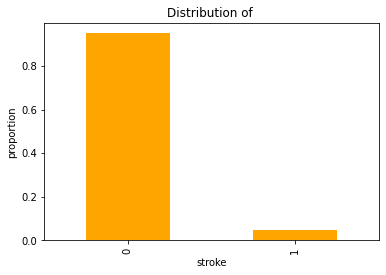

In [25]:
data["stroke"].value_counts(normalize=True).plot(kind="bar", color="orange")
plt.ylabel('proportion')
plt.title("Distribution of " )
plt.savefig("stroke.png")
plt.show()

In [ ]:
"""On ppeut deduire de ces bar plots qu'il y a un grand desequilibre dans nos donnees. Il y a par exemple pres de 90% de personnes ne souffrant pas d'AVC contre seulement environ 1% de personnes qui en souffre. Nous allons donc proceder a un reechantillonage (sous ou sur) pour regler ce probleme"""

In [ ]:
sn.histplot(data["age"].value_counts())

In [ ]:
#Nous allons ploter les histogram pour observer les distributions de plus pres

def toplot_hist(col):
    sn.set
    sn.histplot(data[col].value_counts())
    plt.title("Historgram {}" .format(col))
    return plt.show()
    

In [ ]:
interact(toplot_hist, col=numerical_columns)

# Analyse bivariee

In [1]:
interact(bar_plot_biv,col=categorical_column)

NameError: name 'interact' is not defined

In [ ]:
interact(boxplot_biv,col=numerical_columns)

In [ ]:
"""Les personnes souffrant d'AVC sont generalement plus agees que les personnes qui en souffrent.
Le taux de glucose des personnes est generalement plus eleve chez les personnes souffrant de la maladie que chez les personnes saines. 
Idem pour l'indice de masse corporel"""


In [ ]:
# enregistrement des donnees
#data.to_csv('data_before_encoding')

# Encodage

In [20]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [21]:
df=data.copy()

In [22]:
for col in df.select_dtypes('object'):
    print(" ")
    print(df[col].unique())
    print("{} have {} categories".format(col,df[col].nunique()))

 
['Male' 'Female']
gender have 2 categories
 
['Yes' 'No']
ever_married have 2 categories
 
['Private' 'Self-employed' 'Govt_job' 'children']
work_type have 4 categories
 
['Urban' 'Rural']
Residence_type have 2 categories
 
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
smoking_status have 4 categories


In [23]:
df_encoding=pd.DataFrame()

In [24]:
df_encoding['gender'] = df['gender'].map({"Female": 0, "Male" : 1})
df_encoding['ever_married'] =df['ever_married'].map({"No": 0, "Yes" : 1})
df_encoding['work_type']=df['work_type'].map({'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3})
df_encoding['Residence_type']=df['Residence_type'].map({'Urban': 0,  'Rural': 1})
df_encoding['smoking_status']=df['smoking_status'].map({ 'formerly smoked': 0, 'never smoked': 1, 'smokes' :2, 'Unknown' : 3 })

In [25]:
df_encoding.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,0,0,0
1,1,1,0,1,1
2,0,1,0,0,2
3,0,1,1,1,1
4,1,1,0,0,0


In [26]:
for col in data.select_dtypes('float64'):
    df_encoding[col]=df[col]
    
for col in data.select_dtypes('int64'):
    df_encoding[col]=df[col]

In [27]:
df_encoding.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,1,1,0,0,0,67.0,228.69,36.6,0,1,1
1,1,1,0,1,1,80.0,105.92,32.5,0,1,1
2,0,1,0,0,2,49.0,171.23,34.4,0,0,1
3,0,1,1,1,1,79.0,174.12,24.0,1,0,1
4,1,1,0,0,0,81.0,186.21,29.0,0,0,1


In [28]:
df_encoding.to_csv("data_encoder")

In [29]:
df_encoding.shape

(4981, 11)

In [28]:
df_scaled=pd.DataFrame()
value_tobe_scaled=pd.DataFrame()

for col in data.select_dtypes('float64'):
    value_tobe_scaled[col] = df_encoding[col] 

In [29]:
value_tobe_scaled.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,80.0,105.92,32.5
2,49.0,171.23,34.4
3,79.0,174.12,24.0
4,81.0,186.21,29.0


In [30]:
# Nos donnees ne sont pas a la meme echelle. Ceci pourrait poser un probleme lors de la modelisation nous allons procedons a une standardisation

scaler_=MinMaxScaler()
df_scaled=scaler_.fit_transform(value_tobe_scaled)

In [31]:
df_scaled=pd.DataFrame(df_scaled, columns=numerical_columns)

In [32]:
df_scaled.head()

,age,avg_glucose_level,bmi
0,0.816895,0.801265,0.647564
1,0.975586,0.234512,0.530086
2,0.597168,0.536008,0.584527
3,0.963379,0.549349,0.286533
4,0.987793,0.605161,0.429799


In [33]:
df_loged=pd.DataFrame()

In [34]:
for col in df_encoding.select_dtypes('int64'):
    df_scaled[col]=df_encoding[col]
    df_loged[col]=df_encoding[col]
    

In [35]:
df_scaled.head()

,age,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,0.816895,0.801265,0.647564,1,1,0,0,0,0,1,1
1,0.975586,0.234512,0.530086,1,1,0,1,1,0,1,1
2,0.597168,0.536008,0.584527,0,1,0,0,2,0,0,1
3,0.963379,0.549349,0.286533,0,1,1,1,1,1,0,1
4,0.987793,0.605161,0.429799,1,1,0,0,0,0,0,1


In [36]:
df_loged.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,1,1,0,0,0,0,1,1
1,1,1,0,1,1,0,1,1
2,0,1,0,0,2,0,0,1
3,0,1,1,1,1,1,0,1
4,1,1,0,0,0,0,0,1


In [37]:
df_scaled.skew()

age                 -0.144001
avg_glucose_level    1.587526
bmi                  0.371553
gender               0.339351
ever_married        -0.668689
work_type            0.955789
Residence_type       0.033341
smoking_status       0.077397
hypertension         2.740377
heart_disease        3.896191
stroke               4.140942
dtype: float64

In [38]:
"""Les variables heart_disease, stroke, hypertension, le taux de glucose et le work_type sont tres asymetriques. Nous allons les remplacer par leurs valeurs logarithmiques afin de diminuer l'asymetrie de nos variables"""

"Les variables heart_disease, stroke, hypertension, le taux de glucose et le work_type sont tres asymetriques. Nous allons les remplacer par leurs valeurs logarithmiques afin de diminuer l'asymetrie de nos variables"

In [39]:
df_loged['avg_glucose_level']=np.sqrt(df_scaled['avg_glucose_level'])
df_loged['age']=np.sqrt(df_scaled['age'])
df_loged['bmi']=np.sqrt(df_scaled['bmi'])


In [40]:
df_loged.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke,avg_glucose_level,age,bmi
0,1,1,0,0,0,0,1,1,0.895134,0.903822,0.804714
1,1,1,0,1,1,0,1,1,0.484264,0.987718,0.728070
2,0,1,0,0,2,0,0,1,0.732126,0.772766,0.764544
3,0,1,1,1,1,1,0,1,0.741181,0.981519,0.535288
4,1,1,0,0,0,0,0,1,0.777921,0.993878,0.655591


In [41]:
df_loged.isna().sum()

gender               0
ever_married         0
work_type            0
Residence_type       0
smoking_status       0
hypertension         0
heart_disease        0
stroke               0
avg_glucose_level    0
age                  0
bmi                  0
dtype: int64

In [42]:
df_loged.skew()

gender               0.339351
ever_married        -0.668689
work_type            0.955789
Residence_type       0.033341
smoking_status       0.077397
hypertension         2.740377
heart_disease        3.896191
stroke               4.140942
avg_glucose_level    0.735499
age                 -0.796374
bmi                 -0.382489
dtype: float64

In [43]:
def toplot_hist_(col):
    sn.set
    sn.histplot(df_loged[col].value_counts())
    plt.title("Historgram {}" .format(col))
    return plt.show()
    

In [ ]:
interact(toplot_hist_, col=numerical_columns)

# Separation en train test and val set

In [44]:
seed=222

In [50]:

y=df_scaled['stroke']
X=df_scaled.drop('stroke', axis=1)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

In [47]:
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5,random_state=seed,stratify=y_test)

In [48]:
X_train.shape

(3486, 10)

In [49]:
y_train.value_counts(normalize=True).plot(kind='bar')

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

<Axes: xlabel='stroke'>

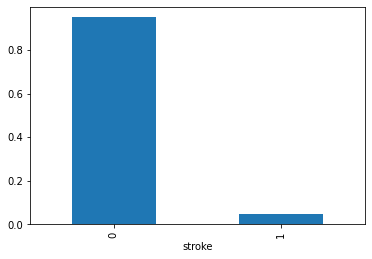

In [45]:
y_test.value_counts(normalize=True).plot(kind='bar')

In [ ]:
y_val.value_counts(normalize=True).plot(kind='bar')

# Reechantillonage

In [50]:
X2=X_train
X2['stroke']=y_train.values
minority=X2[X2.stroke==1]
majority=X2[X2.stroke==0]
minority_upsampled = resample(minority,replace=True,n_samples=len(majority), random_state=seed)
upsampled = pd.concat([majority,minority_upsampled])

In [51]:
upsampled

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,avg_glucose_level,age,bmi,stroke
1319,1,0,0,1,3,0,0,0.563034,0.467707,0.431563,0
226,0,1,0,1,2,0,0,0.153439,0.772766,0.708119,0
4336,0,1,0,1,1,0,0,0.095606,0.633921,0.739782,0
4263,0,0,3,0,3,0,0,0.428640,0.153093,0.428230,0
318,0,0,1,1,1,0,0,0.283661,0.833561,0.447854,0
...,...,...,...,...,...,...,...,...,...,...,...
37,1,1,2,0,2,1,0,0.853799,0.855246,0.421486,1
151,1,1,1,0,0,0,1,0.533133,0.876394,0.766415,1
46,1,1,1,0,1,1,0,0.803550,0.943471,0.733950,1
98,0,0,1,0,0,0,0,0.354092,0.680361,0.535288,1


In [52]:
upsampled['heart_disease'].value_counts().plot(kind='bar')

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [53]:
#sous=echantillonage
majority_downsampled=resample(majority,replace=False,n_samples=len(minority),random_state=seed)

downsampled=pd.concat([minority,majority_downsampled])

In [54]:
X_train_up=upsampled.drop('stroke', axis=1)
y_train_up=upsampled['stroke']

X_train_down=downsampled.drop('stroke', axis=1)
y_train_down=downsampled['stroke']

In [55]:
"""Nous avons deux differents jeux d'entrainements avec lesquels nous pouvons travailler. Nous allons """

"Nous avons deux differents jeux d'entrainements avec lesquels nous pouvons travailler. Nous allons "

In [56]:
train_features=X_train_up
train_labels=y_train_up

# Modelisation

In [53]:
"""Pour ce travail nous voulons eviter de dire a quelqu'un qui est malade qu'il est sein. Ce n'est pas tres grave pour nous de dire a quelqu'un en bonne sante qu'il doit consulter.
Pour cela nous allons plus optimiser notre recall. On veut avoir un recall de 0.85 au moins, une precision de 0.75 et un score F1 de 0.75 et une AUC de 0.8"""

"Pour ce travail nous voulons eviter de dire a quelqu'un qui est malade qu'il est sein. Ce n'est pas tres grave pour nous de dire a quelqu'un en bonne sante qu'il doit consulter.\nPour cela nous allons plus optimiser notre recall. On veut avoir un recall de 0.85 au moins, une precision de 0.75 et un score F1 de 0.75 et une AUC de 0.8"

In [57]:
# Selection des meilleures variables predictrices. Notons que dans les travaux de MUHAMMAD SALMAN et al que les variables les plus importantes pour la prediction des AVC sont :
# Le glucose
#l'age
#l'hypertension
# maladie cardiaques

#rdf : RandomForestClassifier
rdf=RandomForestClassifier()
rdf.fit(train_features,train_labels)
print(classification_report(y_val,rdf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       711
           1       0.00      0.00      0.00        37

    accuracy                           0.93       748
   macro avg       0.47      0.49      0.48       748
weighted avg       0.90      0.93      0.92       748



In [53]:
# Importance des variables
#plt.figure(figsize=(25,25))
features_important=pd.Series(rdf.feature_importances_, index=train_features.columns).sort_values(ascending=False)
#sn.barplot(x=features_important.index, y=features_important)
#plt.xlabel("Variables")
#plt.ylabel("score of importance")
#plt.title("Importance of feature")
#plt.show()


NameError: name 'rdf' is not defined

In [61]:
features_important

age                  0.382799
avg_glucose_level    0.201746
bmi                  0.181097
smoking_status       0.054916
work_type            0.054463
ever_married         0.031209
hypertension         0.024538
Residence_type       0.023821
heart_disease        0.022706
gender               0.022705
dtype: float64

In [52]:
seuil=0.03
features_selected=features_important[features_important>seuil].index.to_list()

NameError: name 'features_important' is not defined

In [63]:
features_selected

['age',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'work_type',
 'ever_married']

In [64]:
# features retunues
train_features=train_features[features_selected]
X_val=X_val[features_selected]
X_test=X_test[features_selected]

# Regression Logistique

In [65]:
param_grid={'C' : [0.001, 0.001, 1, 10, 50,100, 500]}
grid_logistreg_class=GridSearchCV(estimator=LogisticRegression (random_state=seed, max_iter=500), param_grid=param_grid,scoring='f1',cv=5)

logistreg_model=grid_logistreg_class.fit(train_features,train_labels)

#best score
print(round(logistreg_model.best_score_,3))
print(logistreg_model.best_estimator_)

0.781
LogisticRegression(C=100, max_iter=500, random_state=222)


In [66]:
# Evaluation of logistic regression
evaluation_model(logistreg_model,X_val,y_val)

              precision    recall  f1-score   support

           0       0.99      0.72      0.84       711
           1       0.14      0.84      0.23        37

    accuracy                           0.73       748
   macro avg       0.56      0.78      0.53       748
weighted avg       0.95      0.73      0.81       748



In [ ]:
plot_auc(logistreg_model, X_val, y_val)

In [67]:
#rfe with logistregression
rfe_logist=model_with_rfe(logistreg_model.best_estimator_)
rfe_logist

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


RFE(estimator=LogisticRegression(C=100, max_iter=500, random_state=222),
    verbose=1)

In [68]:
evaluation_model(rfe_logist, X_val, y_val)

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       711
           1       0.13      0.81      0.22        37

    accuracy                           0.72       748
   macro avg       0.56      0.76      0.53       748
weighted avg       0.94      0.72      0.80       748



# Random Classifier 

In [71]:
param_grid={'n_estimators' : [10,20,30,40,50,60,70,80,90,100,500,1000],
           'max_depth' : [2,4,3,5,7,8,9,10,11,12,20, None]}

grid_rdf_class=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid,scoring='f1',cv=5,n_jobs=-1)

rdf_model=grid_rdf_class.fit(train_features,train_labels)

#best score
print(round(rdf_model.best_score_,3))
print(rdf_model.best_estimator_)

0.991
RandomForestClassifier(n_estimators=80, random_state=222)


In [85]:
# Evaluation of random classifier
evaluation_model(rdf_model,X_val,y_val)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       711
           1       0.07      0.03      0.04        37

    accuracy                           0.93       748
   macro avg       0.51      0.50      0.50       748
weighted avg       0.91      0.93      0.92       748



In [86]:
evaluation_model(rfe_random, x_all_test_resampled, y_all_test_resampled)

              precision    recall  f1-score   support

           0       0.52      0.98      0.68       710
           1       0.80      0.08      0.15       710

    accuracy                           0.53      1420
   macro avg       0.66      0.53      0.41      1420
weighted avg       0.66      0.53      0.41      1420



In [ ]:
# le modele random forest overfit 

In [73]:
#rfe with random 
rfe_random=model_with_rfe(rdf_model.best_estimator_)
rfe_random

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')


RFE(estimator=RandomForestClassifier(n_estimators=80, random_state=222),
    verbose=1)

In [74]:
evaluation_model(rfe_random, X_val, y_val)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       711
           1       0.08      0.03      0.04        37

    accuracy                           0.94       748
   macro avg       0.51      0.51      0.50       748
weighted avg       0.91      0.94      0.92       748



In [ ]:
"""le modele random forest overfit, nous allons donc essayer de reguler certains de ses parametres pour voir si on regle probleme d'overfitting """

In [75]:
param_grid={'n_estimators' : [80],
            'min_samples_split' :[10],
            'max_leaf_nodes':[2],
            'criterion' : ["log_loss"],
           'max_depth' : [20]}

rdf_with_over=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid,scoring='f1',cv=5,n_jobs=-1)

rdf_with_over=rdf_with_over.fit(train_features,train_labels)

#best score
print(round(rdf_with_over.best_score_,3))
print(rdf_with_over.best_estimator_)

0.795
RandomForestClassifier(criterion='log_loss', max_depth=20, max_leaf_nodes=2,
                       min_samples_split=10, n_estimators=80, random_state=222)


In [76]:
#oob_decision_function_
evaluation_model(rdf_with_over, X_val, y_val)

              precision    recall  f1-score   support

           0       0.99      0.59      0.74       711
           1       0.10      0.89      0.18        37

    accuracy                           0.60       748
   macro avg       0.55      0.74      0.46       748
weighted avg       0.95      0.60      0.71       748



In [84]:
evaluation_model(rdf_with_over, x_all_test_resampled, y_all_test_resampled)

              precision    recall  f1-score   support

           0       0.99      0.58      0.73       710
           1       0.70      1.00      0.82       710

    accuracy                           0.79      1420
   macro avg       0.85      0.79      0.78      1420
weighted avg       0.85      0.79      0.78      1420



In [49]:
import sys
sys.path.append(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\module_memoire")

!pip install imblearn
from to_resample import *

x_all_test_resampled,y_all_test_resampled,resampler_all=resampling_data(X_test,y_test,"SMOTE")

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [77]:
model_rdf_optimis=model_with_rfe(rdf_with_over.best_estimator_)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Index(['age', 'avg_glucose_level', 'work_type'], dtype='object')


In [78]:
evaluation_model(model_rdf_optimis, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.58      0.73       710
           1       0.11      0.97      0.19        37

    accuracy                           0.60       747
   macro avg       0.55      0.78      0.46       747
weighted avg       0.95      0.60      0.71       747



# random classifier with optimisation of all parameters

In [ ]:
param_grid={'n_estimators' : [10,20,30,40,50,60,70,80,90,100,500,1000],
            'min_samples_split' :[4,8,10,,20,30,40,50],
            'max_leaf_nodes':[2,4,8,10,,20,30,40,50],
            'criterion' : ["gini", "entropy", "log_loss"],
            'max_features' : ["sqrt", "log2", None],
            'class_weight' : ["balanced", "balanced_subsample"],
           'max_depth' : [2,4,3,5, None]}

grid_rdf_class=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_grid,scoring='f1',cv=5)

rdf_model=grid_rdf_class.fit(train_features,train_labels)

#best score
print(round(rdf_model.best_score_,3))
print(rdf_model.best_estimator_)

In [ ]:
# Evaluation of svc with validation data
evaluation_model(rdf_model, X_val, y_val)

In [ ]:
# Evaluation of svc with test data
evaluation_model(rdf_model, X_test, y_test)

# Classifier Perceptron

In [1]:
mlp= MLPClassifier(random_state=seed, max_iter=1000)
parameters={'hidden_layer_sizes' : [(50,), (100,), (200,)], 
            'activation' : ['identity', 'logistic','tanh','relu'],
           'learning_rate':['constant', 'invscaling', 'adaptive']}

mlp_grid=GridSearchCV(mlp, parameters, scoring='f1', cv=5, n_jobs=-1)
mlp_grid.fit(train_features,train_labels)

NameError: name 'MLPClassifier' is not defined

In [2]:
print(round(mlp_grid.best_score_,3))

NameError: name 'mlp_grid' is not defined

In [3]:
# Evaluation of random classifier
evaluation_model(mlp_grid,X_val,y_val)

NameError: name 'evaluation_model' is not defined

# SVM

In [ ]:
svc=SVC(random_state=seed)
svc_hyp={'kernel' : ['linear','rbf'], 'C' : [0.1, 1, 10, 50,100]}
svc_grid=GridSearchCV(svc,svc_hyp, scoring='f1', cv=5)
svc_grid.fit(train_features,train_labels)


In [ ]:
print(round(svc_grid.best_score_,3))
print(svc_grid.best_estimator_)

In [ ]:
# Evaluation of svc with validation data
evaluation_model(svc_grid,X_val,y_val)

In [ ]:
# Evaluation of svc with test data
evaluation_model(svc_grid,X_test,y_test)

In [ ]:
plot_auc(svc_grid,X_val,y_val)

# Second part

In [ ]:
 """Pour la premiere section nous avons encoder les variables en utilisant des chiffres. Il se pourrait que nos modeles soient sensibles a cet ordre entre les chiffres alors que nous les utilisons justes pour representer des categories. Dans cette section nous allons donc utiliser OneHotEncoding pour encoder nos variables et voir comment se comporte nos modeles. Nous esperons qu'ils soient meilleurs ❤️"""

In [ ]:
data_before_encoding=pd.read_csv('data_before_encoding')

In [ ]:
data_before_encoding.head()

In [ ]:
data_before_encoding.drop("Unnamed: 0",inplace=True,axis=1)

In [ ]:
data_before_encoding.head()

In [ ]:
# ct for column transformer
ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(), ['gender','ever_married','work_type','Residence_type','smoking_status'])], remainder='passthrough')
df2_encode_=ct.fit_transform(data_before_encoding)

In [ ]:
df2_encode_=pd.DataFrame(df2_encode_, columns=['gender_male','gender_female','married_yes','married_no','work_private','work_self','work_govt','work_child','urban','rural','formerly smoked' ,'never smoked' ,'smokes' ,'Unknown_smokes','age','hypertension','heart_disease','avg_glucose','bmi','stroke'])

In [ ]:
df2_encode_.head()

# Scaling

Nous allons ramener nos valeurs a la meme echelle

In [ ]:
df2_encode_.describe()

In [ ]:
df2_to_scaled=pd.DataFrame()

In [ ]:
df2_to_scaled["age"]=df2_encode_["age"]
df2_to_scaled["avg_glucose"]=df2_encode_["avg_glucose"]
df2_to_scaled["bmi"]=df2_encode_["bmi"]

In [ ]:
df2_to_scaled.head()

In [ ]:
scaler2=MinMaxScaler()
df2_scaled=scaler2.fit_transform(df2_to_scaled)

In [ ]:
df2_scaled=pd.DataFrame(df2_scaled,columns=['age','avg_glucose','bmi'])

In [ ]:
df2_scaled.head()

In [ ]:
df2_scaled.skew()

In [ ]:
df2_encode_["age"]=df2_scaled["age"]
df2_encode_["avg_glucose"]=df2_scaled["avg_glucose"]
df2_encode_["bmi"]=df2_scaled["bmi"]

In [ ]:
df2_encode_

In [ ]:
df2_encode_.to_csv("df2_encoder.csv")

# Separation of our data 

In [ ]:
y2_=df2_encode_["stroke"]
X2_=df2_encode_.drop("stroke",axis=1)

In [ ]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2_,y2_,test_size=0.3,random_state=seed, stratify=y2_)

In [ ]:
X2_test,X2_val,y2_test,y2_val=train_test_split(X2_test,y2_test,test_size=0.3,random_state=seed, stratify=y2_test)

# Reechantillonage

In [ ]:
X2_=X2_train
X2_["stroke"]=y2_train.values


In [ ]:
minority2=X2_[X2_.stroke==1]
majority2=X2_[X2_.stroke==0]

In [ ]:
minority2.head()

In [ ]:
minority2_upsampled = resample(minority2,replace=True,n_samples=len(majority2), random_state=seed)
upsampled2 = pd.concat([majority2,minority2_upsampled])

In [ ]:
X2_train_up=upsampled2.drop('stroke', axis=1)
y2_train_up=upsampled2['stroke']

# Modelisation 

## Logistic Regression

In [ ]:
rdf2=RandomForestClassifier()
rdf2.fit(X2_train_up,y2_train_up)
print(classification_report(y2_val,rdf2.predict(X2_val)))

In [ ]:
rdf2.feature_importances_

In [ ]:
# Importance des variables
plt.figure(figsize=(25,25))
features_important=pd.Series(rdf2.feature_importances_, index=X2_train_up.columns).sort_values(ascending=False)
sn.barplot(x=features_important.index, y=features_important)
plt.xlabel("Variables")
plt.ylabel("score of importance")
plt.title("Importance of feature")
plt.show()

In [ ]:
features2_selected =features_important[features_important>0.03].index.to_list()

In [ ]:
features2_selected

In [ ]:
# features retunues
X2_train_up=X2_train_up[features2_selected]
X2_val=X2_val[features2_selected]
X2_test=X2_test[features2_selected]

# Regression logistic 

In [ ]:
param_log={ "C": [0.0001, 0.001, 1, 10, 50,100, 500],
           #"penalty": ['l1', 'l2', 'elasticnet', None],
           #"solveur" : ['lbfgs','newton-cholesky','sag','saga']
          }

In [ ]:
logist2=GridSearchCV(estimator=LogisticRegression(random_state=seed), param_grid=param_log,scoring='f1',cv=5)

logist2=logist2.fit(X2_train_up,y2_train_up)

#best score
print(round(logist2.best_score_,3))
print(logist2.best_estimator_)

In [ ]:
evaluation_model(logist2,X2_test,y2_test)

In [ ]:
evaluation_model(logist2,X2_val,y2_val)

# Random classifier

In [ ]:
param_rdm={'n_estimators' : [20,30,80],
            'min_samples_split' :[4,8,10],
            'max_leaf_nodes':[2,4,10],
            'criterion' : ["gini","log_loss"],
           'max_depth' : [10,20,30]}
rdm_clas=GridSearchCV(estimator=RandomForestClassifier(random_state=seed), param_grid=param_rdm, cv=5, scoring='f1')
rdm_clas=rdm_clas.fit(X2_train_up,y2_train_up)

#best score
print(round(rdm_clas.best_score_,3))
print(rdm_clas.best_estimator_)

evaluation_model(rdm_clas,X2_test,y2_test)

In [ ]:
evaluation_model(rdm_clas,X2_val,y2_val)

In [ ]:
# SVC

In [ ]:
svc=SVC(random_state=seed)
param_svc={'kernel' : ['linear','rbf'], 'C' : [0.1, 1, 10, 50,100]}
svc2_grid=GridSearchCV(svc,svc_hyp, scoring='f1', cv=5)
svc2_grid.fit(X2_train_up, y2_train_up)
print(round(svc2_grid.best_score_,3))
print(svc2_grid.best_estimator_)


In [ ]:
evaluation_model(svc2_grid,X2_test,y2_test)

In [ ]:
evaluation_model(svc2_grid,X2_val,y2_val)

In [ ]:
plot_auc(svc2_grid,X2_test,y2_test)

# third part :

In [ ]:
""" Dans cette seconde partie nous allons considerer que la valeur Unknown que peut prendre la variable smoking est une valeur manquante et l'imputer """

In [ ]:
data.head()

In [ ]:
data.sample(10)

In [ ]:
data.smoking_status.replace('Unknown', np.nan, inplace=True)

In [ ]:
data.smoking_status.sample(10)

In [ ]:
data.isna().sum()

In [ ]:
"""Il y a donc 1500 personnes dont nous ne connaissons le statut par rapport a la var Smoking"""

# Imputation of data

In [ ]:
X_for_imputation=data.copy()

In [ ]:
y_for_imput=data["smoking_status"]

In [ ]:
y_for_imput.to_csv("y_for_imput.csv")

In [ ]:
X_for_imputation.dropna(inplace=True)

In [ ]:
X_for_imputation.head()

In [ ]:
X_for_imputation.drop("smoking_status", axis=1,inplace=True)

In [ ]:
X_for_imputation['gender'] = X_for_imputation['gender'].map({"Female": 0, "Male" : 1})
X_for_imputation['ever_married'] =X_for_imputation['ever_married'].map({"No": 0, "Yes" : 1})
X_for_imputation['work_type']=X_for_imputation['work_type'].map({'Private' : 0, 'Self-employed' : 1, 'Govt_job' : 2, 'children' : 3})
X_for_imputation['Residence_type']=X_for_imputation['Residence_type'].map({'Urban': 0,  'Rural': 1})
#df_encoding['smoking_status']=df['smoking_status'].map({ 'formerly smoked': 0, 'never smoked': 1, 'smokes' :2, 'Unknown' : 3 })

In [ ]:
X_for_imputation.head()

In [ ]:
X_for_imputation.isna().sum()

In [ ]:
X_for_imputation.sample(20)

In [ ]:
X_for_imputation.to_csv("X_imput_smok.csv")

In [ ]:
data.sample(10)

In [ ]:
missing_values=data[data.smoking_status=="Unknown"]

In [ ]:
missing_values.head()

In [ ]:
missing_values.shape

In [ ]:
missing_values.to_csv("missing_values.csv")

In [ ]:
kmeans = KMeans(n_clusters=5)


In [ ]:
kmeans.fit(X_for_imputation)